# 01ZLMA - Exercise 01

Load the dataset and named it: fishcatch.dat.txt

Exercise 01 of the course 01ZLMA.

Contents

*   Recap of multivariable linear regression (FJFI course 01RAD)
*   Discussion about organizational/run of the course
*   Introduction into Google colab notebooks








# Regression analysis
## Fish Catch Dataset
159 fishes of 7 species are caught and measured. Altogether there are 8 variables. All the fishes are caught from the same lake (Laengelmavesi) near Tampere in Finland.

SOURCES: Brofeldt, Pekka: Bidrag till kaennedom on fiskbestondet i vaera sjoear. Laengelmaevesi. T.H.Jaervi: Finlands Fiskeriet Band 4, Meddelanden utgivna av fiskerifoereningen i Finland. Helsingfors 1917

VARIABLE DESCRIPTIONS:

1. Obs Observation number ranges from 1 to 159
2. Species (Numeric)

    Code Finnish  Swedish    English        Latin      
    1   Lahna    Braxen     Bream          Abramis brama
    2   Siika    Iiden      Whitewish      Leusiscus idus
    3   Saerki   Moerten    Roach          Leuciscus rutilus
    4   Parkki   Bjoerknan  Blicca         Abramis bjrkna
    5   Norssi   Norssen    Smelt          Osmerus eperlanus
    6   Hauki    Jaedda     Pike           Esox lucius
    7   Ahven    Abborre    Perch          Perca fluviatilis
3. Weight Weight of the fish (in grams)

4. Length1 Length from the nose to the beginning of the tail (in cm)
5. Length2 Length from the nose to the notch of the tail (in cm)
6. Length3 Length from the nose to the end of the tail (in cm)
7. Height% Maximal height as % of Length3
8. Width% Maximal width as % of Length3
9. Sex 1 = male 0 = female

Load required libraries:

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

In [ ]:
# read dataset
df=pd.read_csv("fishcatch.dat.txt", sep = ' ', header=None, names=["Obs", "Species", "Weight", "Len1", "Len2", "Len3", "Height", "Width", "Sex"])
# show dataframe
df

,Obs,Species,Weight,Len1,Len2,Len3,Height,Width,Sex
NaN,1,1,242.0,23.2,25.4,30.0,38.4,13.4,NaN
NaN,2,1,290.0,24.0,26.3,31.2,40.0,13.8,NaN
NaN,3,1,340.0,23.9,26.5,31.1,39.8,15.1,NaN
NaN,4,1,363.0,26.3,29.0,33.5,38.0,13.3,NaN
NaN,5,1,430.0,26.5,29.0,34.0,36.6,15.1,NaN
...,...,...,...,...,...,...,...,...,...
NaN,155,7,1100.0,39.0,42.0,44.6,28.7,15.4,0.0
NaN,156,7,1000.0,39.8,43.0,45.2,26.4,16.1,0.0
NaN,157,7,1100.0,40.1,43.0,45.5,27.5,16.3,0.0
NaN,158,7,1000.0,40.2,43.5,46.0,27.4,17.7,1.0


In [ ]:
# summary of df
print(df.describe())

              Obs     Species       Weight        Len1        Len2  \
count  159.000000  159.000000   158.000000  159.000000  159.000000   
mean    80.000000    4.496855   398.695570   26.247170   28.415723   
std     46.043458    2.394282   359.086204    9.996441   10.716328   
min      1.000000    1.000000     0.000000    7.500000    8.400000   
25%     40.500000    2.000000   120.000000   19.050000   21.000000   
50%     80.000000    5.000000   272.500000   25.200000   27.300000   
75%    119.500000    7.000000   650.000000   32.700000   35.500000   
max    159.000000    7.000000  1650.000000   59.000000   63.400000   

             Len3      Height       Width        Sex  
count  159.000000  159.000000  159.000000  72.000000  
mean    31.227044   28.313208   14.116352   0.236111  
std     11.610246    8.301122    2.274372   0.427672  
min      8.800000   14.500000    8.700000   0.000000  
25%     23.150000   24.250000   13.400000   0.000000  
50%     29.400000   27.100000   14.6000

In [ ]:
# delete NaN
df.dropna(subset=['Weight'], how='any', inplace=True)
# change NaN to Unknown
df['Sex'] = df['Sex'].fillna('Unknown')
# as factor
df['Sex'] = df['Sex'].astype(object)
df['Species'] = df['Species'].astype(object)
# replace 0 to female
df['Sex'] = df['Sex'].replace(0, 'female')
df['Sex'] = df['Sex'].replace(1, 'male')
# delete column of Obs
del df['Obs']
df.reset_index(drop=True, inplace=True)
df

,Species,Weight,Len1,Len2,Len3,Height,Width,Sex
0,1,242.0,23.2,25.4,30.0,38.4,13.4,Unknown
1,1,290.0,24.0,26.3,31.2,40.0,13.8,Unknown
2,1,340.0,23.9,26.5,31.1,39.8,15.1,Unknown
3,1,363.0,26.3,29.0,33.5,38.0,13.3,Unknown
4,1,430.0,26.5,29.0,34.0,36.6,15.1,Unknown
...,...,...,...,...,...,...,...,...
153,7,1100.0,39.0,42.0,44.6,28.7,15.4,female
154,7,1000.0,39.8,43.0,45.2,26.4,16.1,female
155,7,1100.0,40.1,43.0,45.5,27.5,16.3,female
156,7,1000.0,40.2,43.5,46.0,27.4,17.7,male


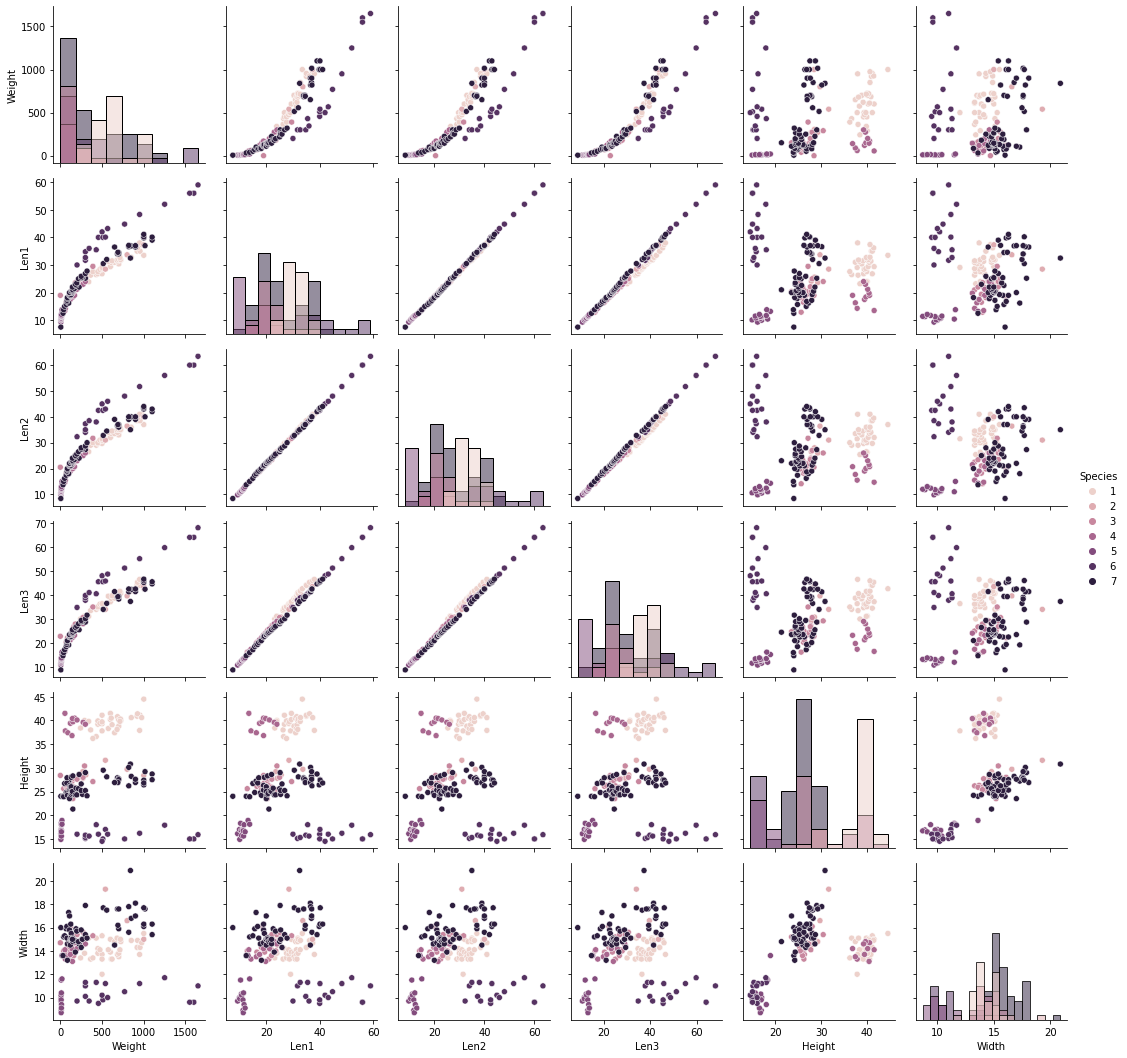

In [ ]:
# basic graphs of dataset
g = sns.PairGrid(df, hue="Species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


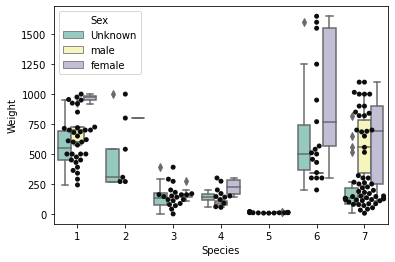

In [ ]:
# boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x="Species", y="Weight", hue="Sex", data=df, palette="Set3")
sns.swarmplot(x="Species", y="Weight", data=df, color="0.05")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


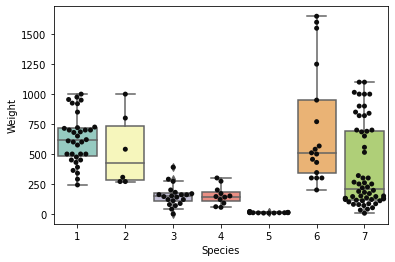

In [ ]:
sns.boxplot(x="Species", y="Weight", data=df, palette="Set3")
sns.swarmplot(x="Species", y="Weight", data=df, color="0.05")

# Your turn 01

* Recode Species, instead numeric use fish names.
* Which variables look promising, which variables can be omitted.
* Edit the dataset
* Plot Height vs. Weight, Leng3 vs. Weight, Width vs. Weight



# Regression

In [ ]:
# read dataset
file="fishcatch.dat.txt"
df=pd.read_csv(file, sep = ' ', header=None, names=["Obs", "Species", "Weight", "Len1", "Len2", "Len3", "Height", "Width", "Sex"])
df.reset_index(drop=True, inplace=True)
# show dataframe
df

,Obs,Species,Weight,Len1,Len2,Len3,Height,Width,Sex
0,1,1,242.0,23.2,25.4,30.0,38.4,13.4,NaN
1,2,1,290.0,24.0,26.3,31.2,40.0,13.8,NaN
2,3,1,340.0,23.9,26.5,31.1,39.8,15.1,NaN
3,4,1,363.0,26.3,29.0,33.5,38.0,13.3,NaN
4,5,1,430.0,26.5,29.0,34.0,36.6,15.1,NaN
...,...,...,...,...,...,...,...,...,...
154,155,7,1100.0,39.0,42.0,44.6,28.7,15.4,0.0
155,156,7,1000.0,39.8,43.0,45.2,26.4,16.1,0.0
156,157,7,1100.0,40.1,43.0,45.5,27.5,16.3,0.0
157,158,7,1000.0,40.2,43.5,46.0,27.4,17.7,1.0


In [ ]:
df['Species'] = df['Species'].replace(1, 'Bream')
df['Species'] = df['Species'].replace(2, 'Whitewish')
df['Species'] = df['Species'].replace(3, 'Roach')
df['Species'] = df['Species'].replace(4, 'Blicca')
df['Species'] = df['Species'].replace(5, 'Smelt')
df['Species'] = df['Species'].replace(6, 'Pike')
df['Species'] = df['Species'].replace(7, 'Perch')
del df['Sex']
# drop data with Weight 0
df = df.loc[df["Weight"] != 0]
# mutate(Species = fct_drop(Species))%>%     
df

,Obs,Species,Weight,Len1,Len2,Len3,Height,Width
0,1,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,2,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,3,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,4,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,5,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...,...
154,155,Perch,1100.0,39.0,42.0,44.6,28.7,15.4
155,156,Perch,1000.0,39.8,43.0,45.2,26.4,16.1
156,157,Perch,1100.0,40.1,43.0,45.5,27.5,16.3
157,158,Perch,1000.0,40.2,43.5,46.0,27.4,17.7


In [ ]:
print(df.describe())

              Obs       Weight        Len1        Len2        Len3  \
count  158.000000   157.000000  158.000000  158.000000  158.000000   
mean    80.208861   401.235032   26.293038   28.465823   31.280380   
std     46.114238   358.809150   10.011427   10.731707   11.627605   
min      1.000000     5.900000    7.500000    8.400000    8.800000   
25%     40.250000   120.000000   19.150000   21.000000   23.200000   
50%     80.500000   273.000000   25.300000   27.400000   29.700000   
75%    119.750000   650.000000   32.700000   35.750000   39.675000   
max    159.000000  1650.000000   59.000000   63.400000   68.000000   

           Height       Width  
count  158.000000  158.000000  
mean    28.312658   14.112658  
std      8.327514    2.281125  
min     14.500000    8.700000  
25%     24.225000   13.400000  
50%     27.000000   14.600000  
75%     37.700000   15.300000  
max     44.500000   20.900000  


In [ ]:
df.dropna(how='any', inplace=True)
# df[df['Weight'].isna()]

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


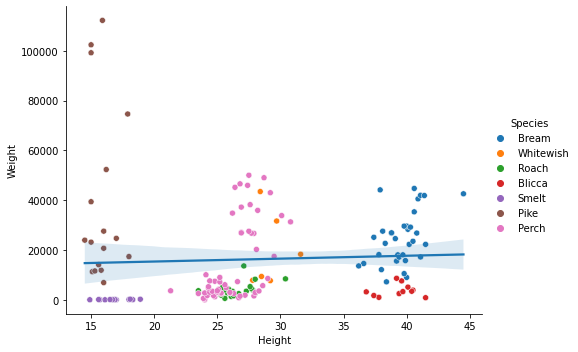

In [ ]:
# print(df['Weight'])
df['Weight'] = df['Weight']*df['Len3']
df['Width'] = df['Width']*df['Len3']
# print(df['Weight'])

### Height_Weight 
# scatter plot
sns.relplot(data=df, x="Height", y="Weight", hue="Species", kind='scatter', aspect=1.4)
# regression plot
sns.regplot(x="Height", y="Weight",  scatter=False, data=df)

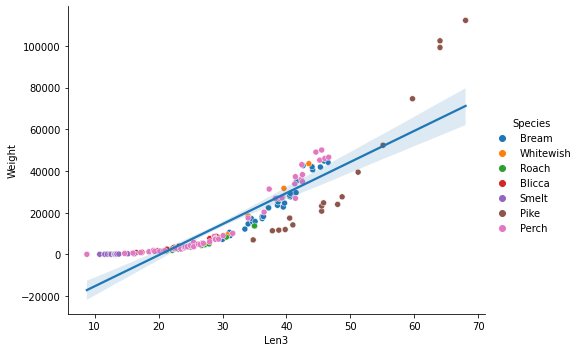

In [ ]:
### Length_Weight
sns.relplot(data=df, x="Len3", y="Weight", hue="Species", kind='scatter', aspect=1.4)
sns.regplot(x="Len3", y="Weight",  scatter=False, data=df)

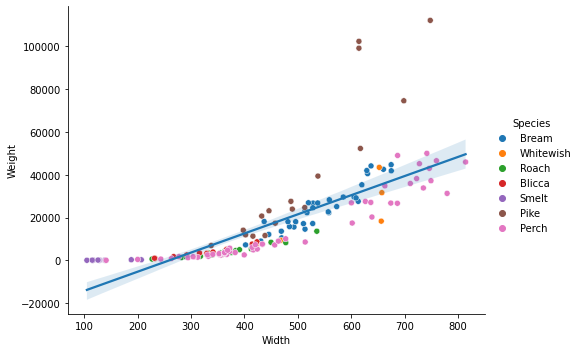

In [ ]:
### Width_Weight
sns.relplot(data=df, x="Width", y="Weight", hue="Species", kind='scatter', aspect=1.4)
sns.regplot(x="Width", y="Weight",  scatter=False, data=df)

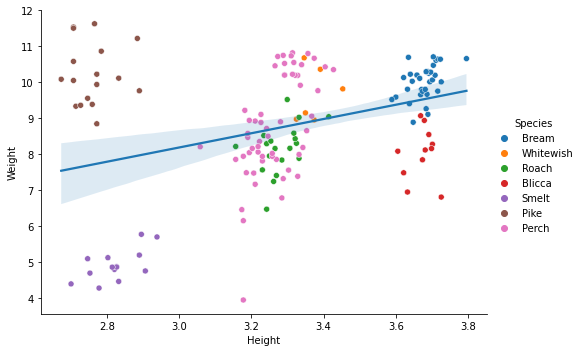

In [ ]:
### Height_Weight_log
# scatter plot
log_Height = np.log(df['Height'])
log_Weight = np.log(df['Weight'])
sns.relplot(data=df, x=log_Height, y=log_Weight, hue="Species", kind='scatter', aspect=1.4)
# regression plot
sns.regplot(x=log_Height, y=log_Weight, scatter=False, data=df)

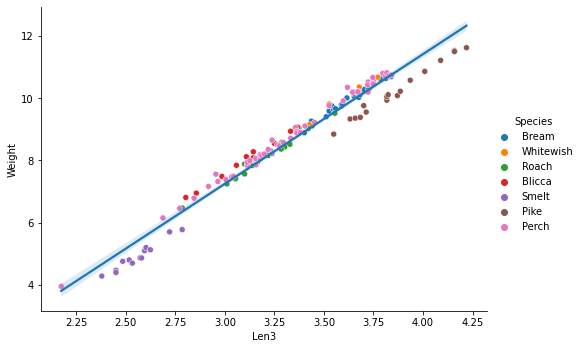

In [ ]:
### Length_Weight_log
log_Len3 = np.log(df['Len3'])
sns.relplot(data=df, x=log_Len3, y=log_Weight, hue="Species", kind='scatter', aspect=1.4)
sns.regplot(x=log_Len3, y=log_Weight, scatter=False, data=df)

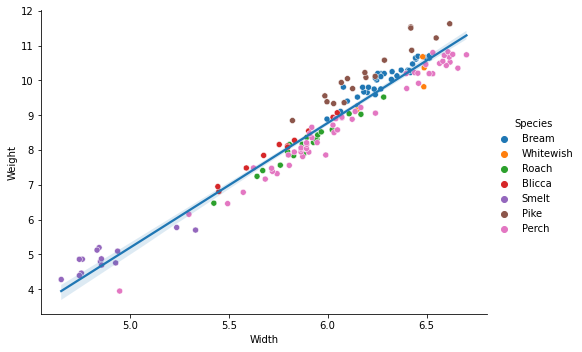

In [ ]:
### Width_Weight_log
log_Width = np.log(df['Width'])
sns.relplot(data=df, x=log_Width, y=log_Weight, hue="Species", kind='scatter', aspect=1.4)
sns.regplot(x=log_Width, y=log_Weight,  scatter=False, data=df)

In [ ]:
X = df[['Len1', 'Len2', 'Len3',	'Height',	'Width']].values.astype(np.float)
Y = df['Weight'].values.astype(np.float)
model = sm.OLS(Y, X**2).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

# OLS can be called
# m0 = smf.ols(formula='Y ~ X**2', data=df).fit()
# print(m0.summary())

regr = LinearRegression()
regr.fit(X**2, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              409.9
Date:                Sat, 14 May 2022   Prob (F-statistic):                    2.71e-86
Time:                        08:48:36   Log-Likelihood:                         -1605.3
No. Observations:                 157   AIC:                                      3221.
Df Residuals:                     152   BIC:                                      3236.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


# Q: 
* How can you interpret previous result?
* Comment and discussion: how to select model.


In [ ]:
# values of AIC and BIC for OLS model
print('AIC: \n', model.aic)
print('BIC: \n', model.bic)

AIC: 
 3220.620855471312
BIC: 
 3235.9020844980537


NOTE: https://www.datasklr.com/ols-least-squares-regression/variable-selection (stepwise p-value)

# AIC and BIC forward selection

In [ ]:
def step_aic(exog, endog, df, **kwargs):

    """
    https://blog.artwolf.in/a?ID=3dbae1d6-888a-4f5d-859f-0976baeae3dc
    This select the best exogenous variables with AIC
    Both exog and endog values can be either str or list.
    (Endog list is for the Binomial family.)
    Note: This adopt only "forward" selection
    Args:
        model: model from statsmodels.formula.api
        exog (str or list): exogenous variables
        endog (str or list): endogenous variables
        kwargs: extra keyword argments for model (e.g., data, family)
    Returns:
        model: a model that seems to have the smallest AIC
    """
    # Exog, endog is kept converts compulsorily in list form
    exog = np.r_[[exog]].flatten()
    endog = np.r_[[endog]].flatten()
    remaining = set(exog)
    selected = []  # adopted the determined factors
    # calculate constant term only AIC
    formula_head = ' + '.join(endog) + ' ~ '
    formula = formula_head + '1'
    aic = smf.ols(formula=formula, data=df, **kwargs).fit().aic
    print('AIC: {}, formula: {}'.format(round(aic, 3), formula))
    current_score, best_new_score = np.ones(2) * aic
    # Whether to adopt all the factors, which factors be added to the end if the rise is AIC
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            # Remaining calculate the AIC when added one at a time factor
            formula_tail = ' + '.join(selected + [candidate])
            formula = formula_head + formula_tail
            aic = smf.ols(formula=formula, data=df, **kwargs).fit().aic
            print('AIC: {}, formula: {}'.format(round(aic, 3), formula))
            scores_with_candidates.append((aic, candidate))
        # And Best_candidate most AIC was small factors
        scores_with_candidates.sort()
        scores_with_candidates.reverse()
        best_new_score, best_candidate = scores_with_candidates.pop()
        # If AIC has dropped in the candidate factors add, add it as a definite factor
        # print(current_score)
        # print(best_new_score)
        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = formula_head + ' + '.join(selected)
    print('The best formula: {}'.format(formula))
    return smf.ols(formula, data=df, **kwargs).fit()

In [ ]:
def step_bic(exog, endog, df, **kwargs):

    """
    https://blog.artwolf.in/a?ID=3dbae1d6-888a-4f5d-859f-0976baeae3dc
    This select the best exogenous variables with BIC
    Both exog and endog values can be either str or list.
    (Endog list is for the Binomial family.)
    Note: This adopt only "forward" selection
    Args:
        model: model from statsmodels.formula.api
        exog (str or list): exogenous variables
        endog (str or list): endogenous variables
        kwargs: extra keyword argments for model (e.g., data, family)
    Returns:
        model: a model that seems to have the smallest BIC
    """
    # Exog, endog is kept converts compulsorily in list form
    exog = np.r_[[exog]].flatten()
    endog = np.r_[[endog]].flatten()
    remaining = set(exog)
    selected = []  # adopted the determined factors
    # calculate constant term only BIC
    formula_head = ' + '.join(endog) + ' ~ '
    formula = formula_head + '1'
    bic = smf.ols(formula=formula, data=df, **kwargs).fit().bic
    print('BIC: {}, formula: {}'.format(round(bic, 3), formula))
    current_score, best_new_score = np.ones(2) * bic
    # Whether to adopt all the factors, which factors be added to the end if the rise is AIC
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            # Remaining calculate the BIC when added one at a time factor
            formula_tail = ' + '.join(selected + [candidate])
            formula = formula_head + formula_tail
            bic = smf.ols(formula=formula, data=df, **kwargs).fit().bic
            print('BIC: {}, formula: {}'.format(round(bic, 3), formula))
            scores_with_candidates.append((bic, candidate))
        # And Best_candidate most BIC was small factors
        scores_with_candidates.sort()
        scores_with_candidates.reverse()
        best_new_score, best_candidate = scores_with_candidates.pop()
        # If BIC has dropped in the candidate factors add, add it as a definite factor
        # print(current_score)
        # print(best_new_score)
        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = formula_head + ' + '.join(selected)
    print('The best formula: {}'.format(formula))
    return smf.ols(formula, data=df, **kwargs).fit()

In [ ]:
# step_aic
step_aic(['Len1', 'Len2', 'Len3',	'Height',	'Width'], 'Y', df)
# step_bic
step_bic(['Len1', 'Len2', 'Len3',	'Height',	'Width'], 'Y', df)

AIC: 3547.936, formula: Y ~ 1
AIC: 3404.527, formula: Y ~ Width
AIC: 3295.354, formula: Y ~ Len2
AIC: 3549.549, formula: Y ~ Height
AIC: 3296.262, formula: Y ~ Len1
AIC: 3300.341, formula: Y ~ Len3
AIC: 3297.271, formula: Y ~ Len2 + Width
AIC: 3297.354, formula: Y ~ Len2 + Height
AIC: 3297.319, formula: Y ~ Len2 + Len1
AIC: 3297.17, formula: Y ~ Len2 + Len3
The best formula: Y ~ Len2
BIC: 3550.992, formula: Y ~ 1
BIC: 3410.64, formula: Y ~ Width
BIC: 3301.467, formula: Y ~ Len2
BIC: 3555.662, formula: Y ~ Height
BIC: 3302.374, formula: Y ~ Len1
BIC: 3306.453, formula: Y ~ Len3
BIC: 3306.44, formula: Y ~ Len2 + Width
BIC: 3306.523, formula: Y ~ Len2 + Height
BIC: 3306.488, formula: Y ~ Len2 + Len1
BIC: 3306.339, formula: Y ~ Len2 + Len3
The best formula: Y ~ Len2


# Your turn 02

* Is there problem with multicolinearity? If so, how can we cope with it.
* Try to find such a good model (based on adjuste R^2) with a maximum of 7 covariates. 

Hint: try to use expert knowledge.


In [ ]:
X = df[['Len1', 'Len2', 'Len3',	'Height',	'Width']].values.astype(np.float)
Y = df['Weight'].values.astype(np.float)
m1 = smf.ols(formula='Y ~ X', data=df).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     123.1
Date:                Sat, 14 May 2022   Prob (F-statistic):           2.01e-51
Time:                        08:48:37   Log-Likelihood:                -1645.5
No. Observations:                 157   AIC:                             3303.
Df Residuals:                     151   BIC:                             3321.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.866e+04   4328.479     -6.622      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = ['Len1', 'Len2', 'Len3',	'Height',	'Width']
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(len(['Len1', 'Len2', 'Len3',	'Height',	'Width']))]
print(vif_data)

  feature           VIF
0    Len1  12954.577808
1    Len2  16576.275643
2    Len3   1172.556231
3  Height     12.895596
4   Width     47.780784


In [ ]:
from sklearn.metrics import cohen_kappa_score
# try to do a kappa matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html

In [ ]:
m1 = smf.ols(formula='Weight ~ Species+Len2:Len3:Height+Len2:Len3:Width', data=df).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     634.5
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.98e-110
Time:                        08:48:37   Log-Likelihood:                -1493.2
No. Observations:                 157   AIC:                             3004.
Df Residuals:                     148   BIC:                             3032.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              233.9458 

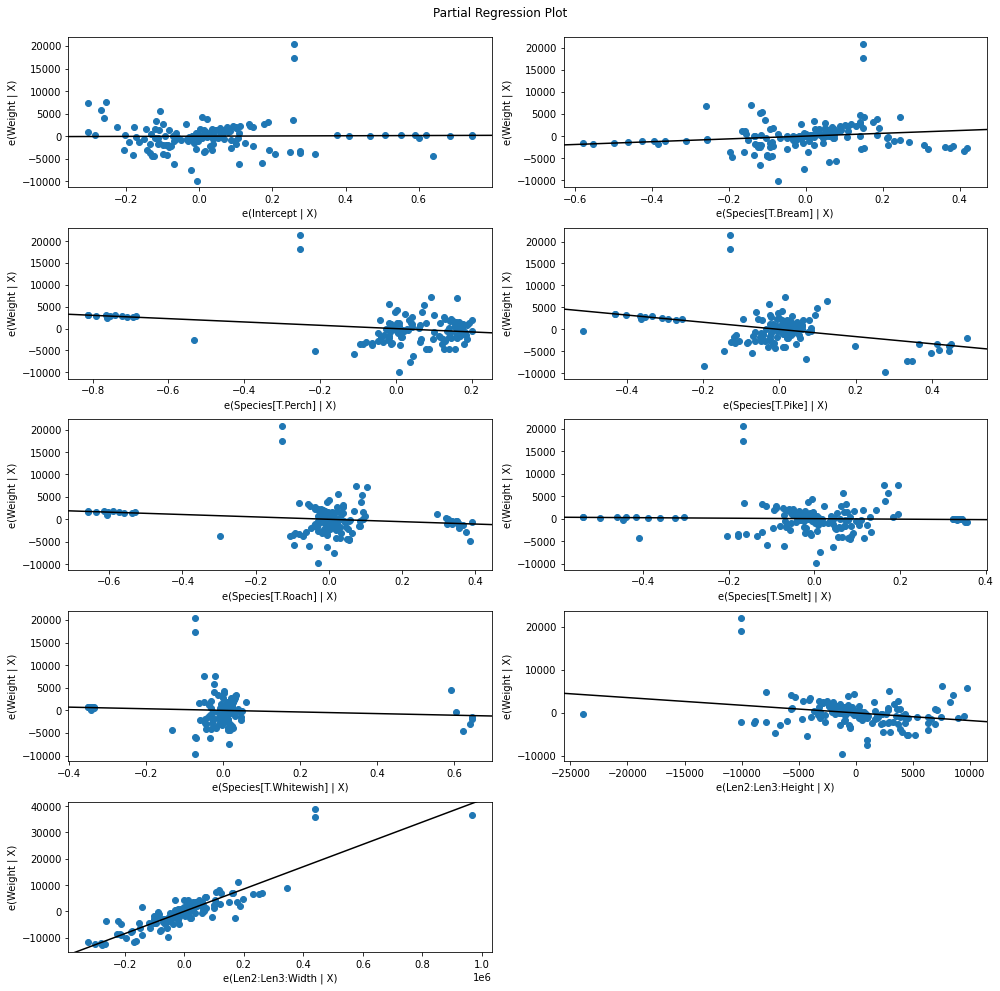

In [ ]:
fig = plt.figure(figsize=(14, 14))
sm.graphics.plot_partregress_grid(m1, fig=fig)
plt.show()


                            OLS Regression Results                            
Dep. Variable:             log_Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     260.3
Date:                Sat, 14 May 2022   Prob (F-statistic):           3.97e-83
Time:                        08:48:39   Log-Likelihood:                -95.317
No. Observations:                 157   AIC:                             208.6
Df Residuals:                     148   BIC:                             236.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.5286 

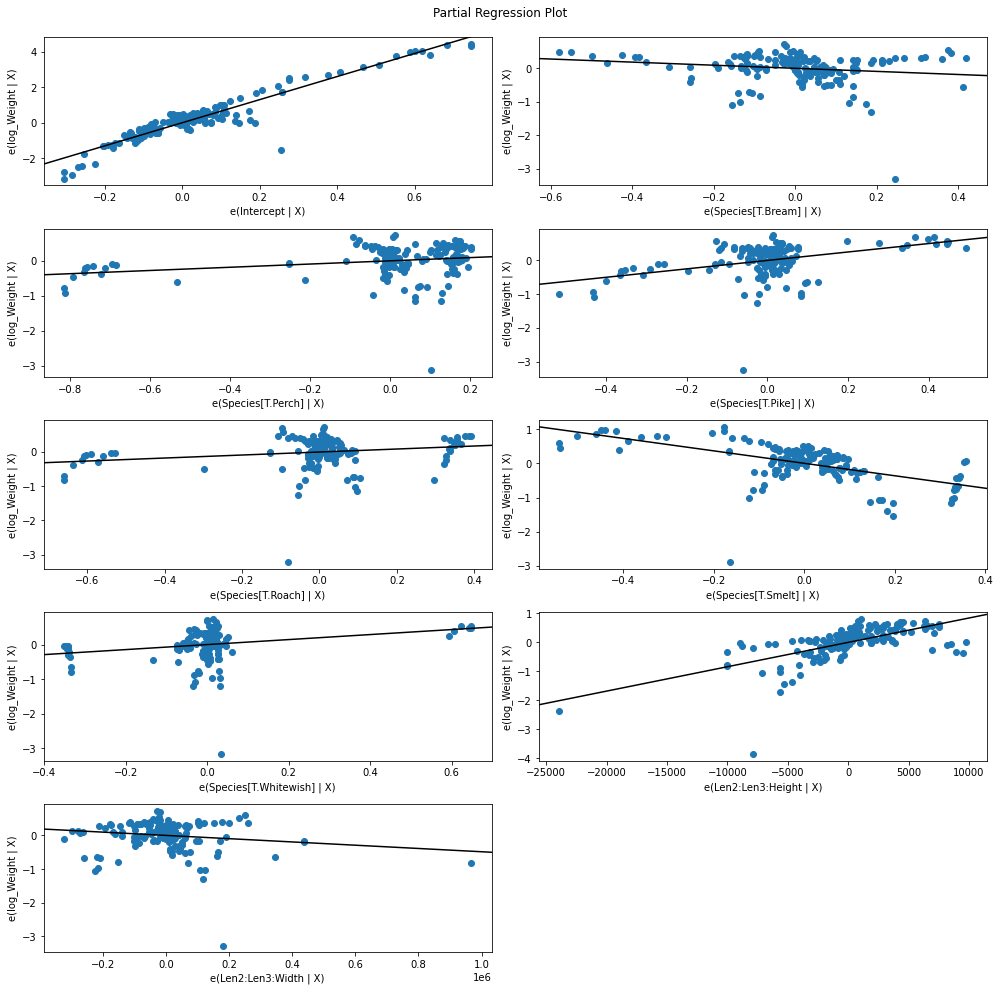

In [ ]:
log_Weight = np.log(df['Weight'])
log_m1 = smf.ols(formula ='log_Weight ~ Species+Len2:Len3:Height+Len2:Len3:Width', data=df).fit()
print(log_m1.summary())
fig = plt.figure(figsize=(14, 14))
sm.graphics.plot_partregress_grid(log_m1, fig=fig)
plt.show()


                            OLS Regression Results                            
Dep. Variable:        log_Weight_Fish   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     258.5
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.52e-82
Time:                        08:48:41   Log-Likelihood:                -95.197
No. Observations:                 156   AIC:                             208.4
Df Residuals:                     147   BIC:                             235.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.5293 

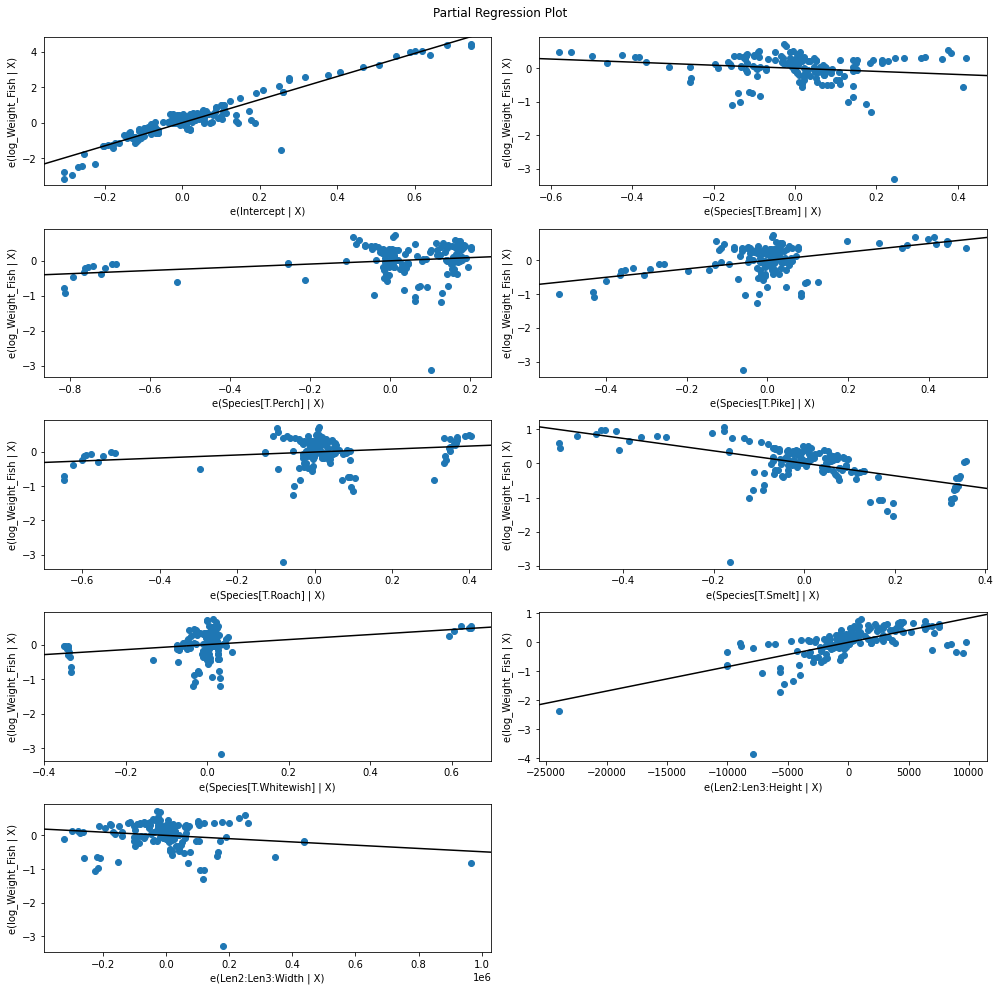

In [ ]:
Fish = df.drop(index=54)
log_Weight_Fish = np.log(Fish['Weight'])
log_m1 = smf.ols(formula ='log_Weight_Fish ~ Species+Len2:Len3:Height+Len2:Len3:Width', data=Fish).fit()
print(log_m1.summary())
fig = plt.figure(figsize=(14, 14))
sm.graphics.plot_partregress_grid(log_m1, fig=fig)
plt.show()

In [ ]:
# Box-Cox transformation
BC_m0 = smf.ols(formula ='log_Weight_Fish ~ Species+I(Len3**2)+Len3:Height:Width', data=Fish).fit()
print(BC_m0.summary())

# https://www.geeksforgeeks.org/box-cox-transformation-using-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html 


                            OLS Regression Results                            
Dep. Variable:        log_Weight_Fish   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     273.2
Date:                Sat, 14 May 2022   Prob (F-statistic):           3.40e-84
Time:                        08:48:43   Log-Likelihood:                -91.150
No. Observations:                 156   AIC:                             200.3
Df Residuals:                     147   BIC:                             227.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.8968 

In [ ]:
sqrt_Weight = np.sqrt(Fish['Weight'])
BC_m1 = smf.ols(formula ='sqrt_Weight ~ Species+I(Len3**2)+Len3:Height+Len3:Width', data=Fish).fit()
print(BC_m1.summary())

                            OLS Regression Results                            
Dep. Variable:            sqrt_Weight   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2773.
Date:                Sat, 14 May 2022   Prob (F-statistic):          2.05e-158
Time:                        08:48:43   Log-Likelihood:                -483.04
No. Observations:                 156   AIC:                             986.1
Df Residuals:                     146   BIC:                             1017.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -24.2378 

                            OLS Regression Results                            
Dep. Variable:        log_Weight_Fish   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5832.
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.31e-186
Time:                        08:48:43   Log-Likelihood:                 183.23
No. Observations:                 156   AIC:                            -338.5
Df Residuals:                     142   BIC:                            -295.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

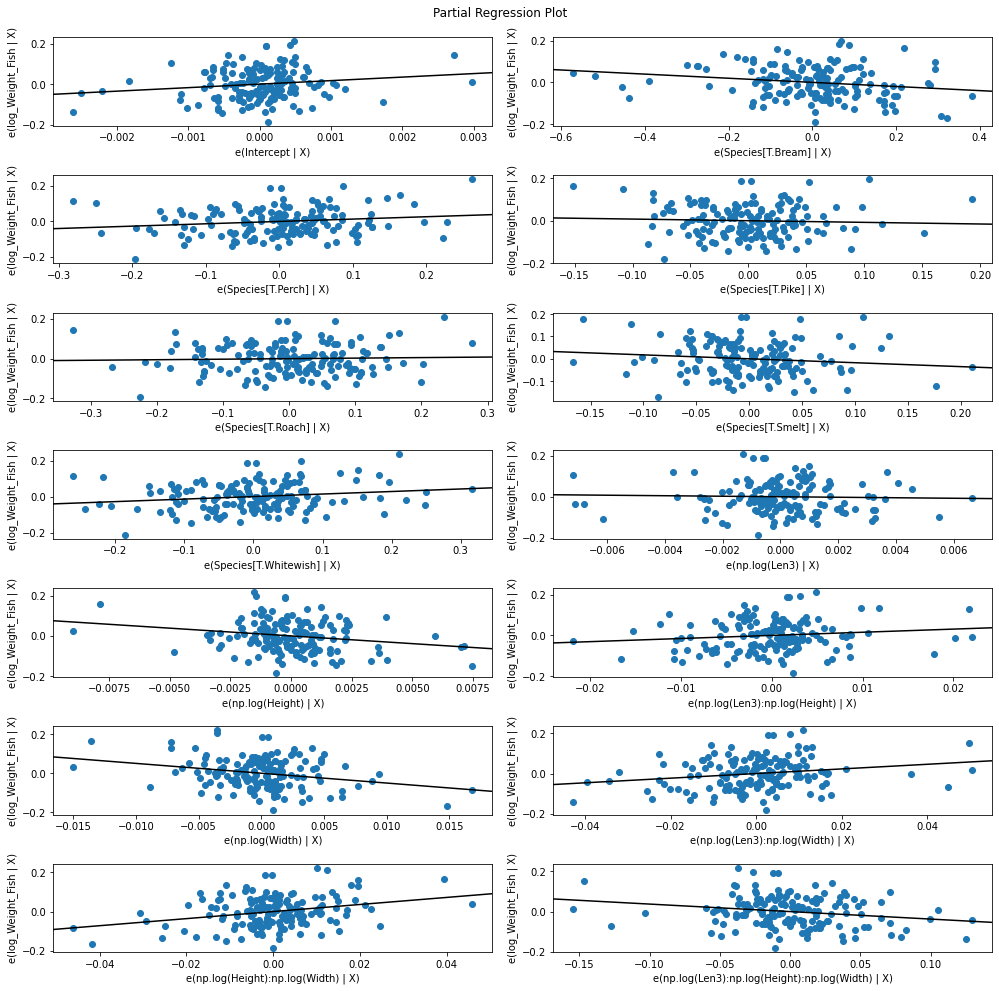

In [ ]:
m_f = smf.ols(formula ='log_Weight_Fish ~ Species+np.log(Len3)*np.log(Height)*np.log(Width)', data=Fish).fit()
print(m_f.summary())

fig = plt.figure(figsize=(14, 14))
sm.graphics.plot_partregress_grid(m_f, fig=fig)
plt.show()